In [1]:
#import libraries
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import requests 
import pandas as pd
import dask.dataframe as pd_dd
import zipfile
import io
import wget
from shapely.geometry import Point
import geopandas as gpd
import random
import json
from fiona.crs import from_epsg
#import pysal as ps
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
data1="/home/jinalklaulitz/Documents/capstone/Input/July 2018 Monthly LinkNYC Data - Per-AP.csv"
data2="/home/jinalklaulitz/Documents/capstone/Input/Link EBT Call Data 041219.xlsx"
data3="/home/jinalklaulitz/Documents/capstone/Input/aff_batch1/clean_batch1/food_stamps_supplemental_nutrition_assistance_program_snap.csv"
output_path="/home/jinalklaulitz/Documents/capstone/Input"

In [3]:
MONTHLY_LNYC_pd = pd.read_excel(data2,'EBT Call Data Per Link')
LINK_EBT_pd = pd.read_csv(data1)
food_stamps_pd = pd.read_csv(data3)

In [4]:
food_stamps_pd.head()

,id,id2,geography,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,households_not_receiving_food_stamps/snap_estimate_households,percent_households_not_receiving_food_stamps/snap_estimate_households,total_estimate_with_one_or_more_people_in_the_household_60_years_and_over,percent_estimate_with_one_or_more_people_in_the_household_60_years_and_over,...,percent_households_receiving_food_stamps/snap_estimate_work_status__families__1_worker_in_past_12_months,households_not_receiving_food_stamps/snap_estimate_work_status__families__1_worker_in_past_12_months,percent_households_not_receiving_food_stamps/snap_estimate_work_status__families__1_worker_in_past_12_months,total_estimate_work_status__families__2_or_more_workers_in_past_12_months,percent_estimate_work_status__families__2_or_more_workers_in_past_12_months,households_receiving_food_stamps/snap_estimate_work_status__families__2_or_more_workers_in_past_12_months,percent_households_receiving_food_stamps/snap_estimate_work_status__families__2_or_more_workers_in_past_12_months,households_not_receiving_food_stamps/snap_estimate_work_status__families__2_or_more_workers_in_past_12_months,percent_households_not_receiving_food_stamps/snap_estimate_work_status__families__2_or_more_workers_in_past_12_months,PUMA
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,33935,80.1,17515,41.3,...,44.2,6871,34.8,12944,50.6,2059,35.2,10885,55.1,3701
1,7950000US3603702,3603702,"NYC-Bronx Community District 12--Wakefield, Wi...",48495,11904,24.5,36591,75.5,19175,39.5,...,41.4,9074,35.7,16831,49.9,3015,36.3,13816,54.3,3702
2,7950000US3603703,3603703,"NYC-Bronx Community District 10--Co-op City, P...",47551,6714,14.1,40837,85.9,22387,47.1,...,40.5,9011,36.2,14254,49.3,1249,30.9,13005,52.3,3703
3,7950000US3603704,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44518,11236,25.2,33282,74.8,16437,36.9,...,41.5,7838,35.2,14402,48.1,2332,30.4,12070,54.2,3704
4,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,28167,49.1,17137,29.8,...,48.6,7795,43.0,12966,34.0,4491,22.4,8475,46.8,3705


In [5]:
#for i in list(food_stamps_pd.columns):
#    print(i)
#    print("\n")

reduced_food_stamps = food_stamps_pd[['id',
'id2',
'geography',
'total_estimate_households',
'households_receiving_food_stamps/snap_estimate_households',
'percent_households_receiving_food_stamps/snap_estimate_households',
'PUMA']]

In [6]:
reduced_food_stamps.head()

,id,id2,geography,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,3701
1,7950000US3603702,3603702,"NYC-Bronx Community District 12--Wakefield, Wi...",48495,11904,24.5,3702
2,7950000US3603703,3603703,"NYC-Bronx Community District 10--Co-op City, P...",47551,6714,14.1,3703
3,7950000US3603704,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44518,11236,25.2,3704
4,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,3705


In [7]:
reduced_food_stamps.dtypes

id                                                                    object
id2                                                                    int64
geography                                                             object
total_estimate_households                                              int64
households_receiving_food_stamps/snap_estimate_households              int64
percent_households_receiving_food_stamps/snap_estimate_households    float64
PUMA                                                                   int64
dtype: object

In [8]:
filename = "geo_export_ba3ea3cb-cf7a-4165-a569-b8e93d5eb73e.shp"
pumashp = gpd.GeoDataFrame.from_file(output_path+"/"+filename)

In [21]:
pumashp.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89995351384715 40.91238343476548...
1,3702,1.889860e+08,106050.002487,POLYGON ((-73.86948896192655 40.87798946841054...
2,3703,2.670108e+08,303565.021099,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415288,POLYGON ((-73.96524103510922 40.65174204697276...


In [9]:
pumashp.dtypes

puma           object
shape_area    float64
shape_leng    float64
geometry       object
dtype: object

In [10]:
pumashp['puma'] = pumashp.puma.astype('int64')

In [11]:
foodstamps_puma = reduced_food_stamps.merge(pumashp,left_on='PUMA',right_on='puma')

In [12]:
foodstamps_puma.head()

,id,id2,geography,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA,puma,shape_area,shape_leng,geometry
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,3701,3701,9.792852e+07,53227.144461,POLYGON ((-73.89995351384715 40.91238343476548...
1,7950000US3603702,3603702,"NYC-Bronx Community District 12--Wakefield, Wi...",48495,11904,24.5,3702,3702,1.889860e+08,106050.002487,POLYGON ((-73.86948896192655 40.87798946841054...
2,7950000US3603703,3603703,"NYC-Bronx Community District 10--Co-op City, P...",47551,6714,14.1,3703,3703,2.670108e+08,303565.021099,(POLYGON ((-73.78833349834532 40.8346671297593...
3,7950000US3603704,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44518,11236,25.2,3704,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,3705,3705,1.224951e+08,68657.316149,POLYGON ((-73.87045508990893 40.86663286876232...


In [13]:
print("table has {} rows".format(len(reduced_food_stamps.index)))

table has 55 rows


In [14]:
print("table has {} rows".format(len(pumashp.index)))

table has 55 rows


In [15]:
print("table has {} rows".format(len(foodstamps_puma.index)))

table has 55 rows


In [16]:
pumashp.crs

{'init': 'epsg:4326'}

In [17]:
pumashp.crs = {'init' :'epsg:4326'}

In [18]:
# Convert to a GeoDataFrame
foodstamps_puma = gpd.GeoDataFrame(foodstamps_puma, geometry="geometry")

In [19]:
foodstamps_puma.crs

In [20]:
#foodstamps_puma['test'] = foodstamps_puma['percent_households_receiving_food_stamps/snap_estimate_households']

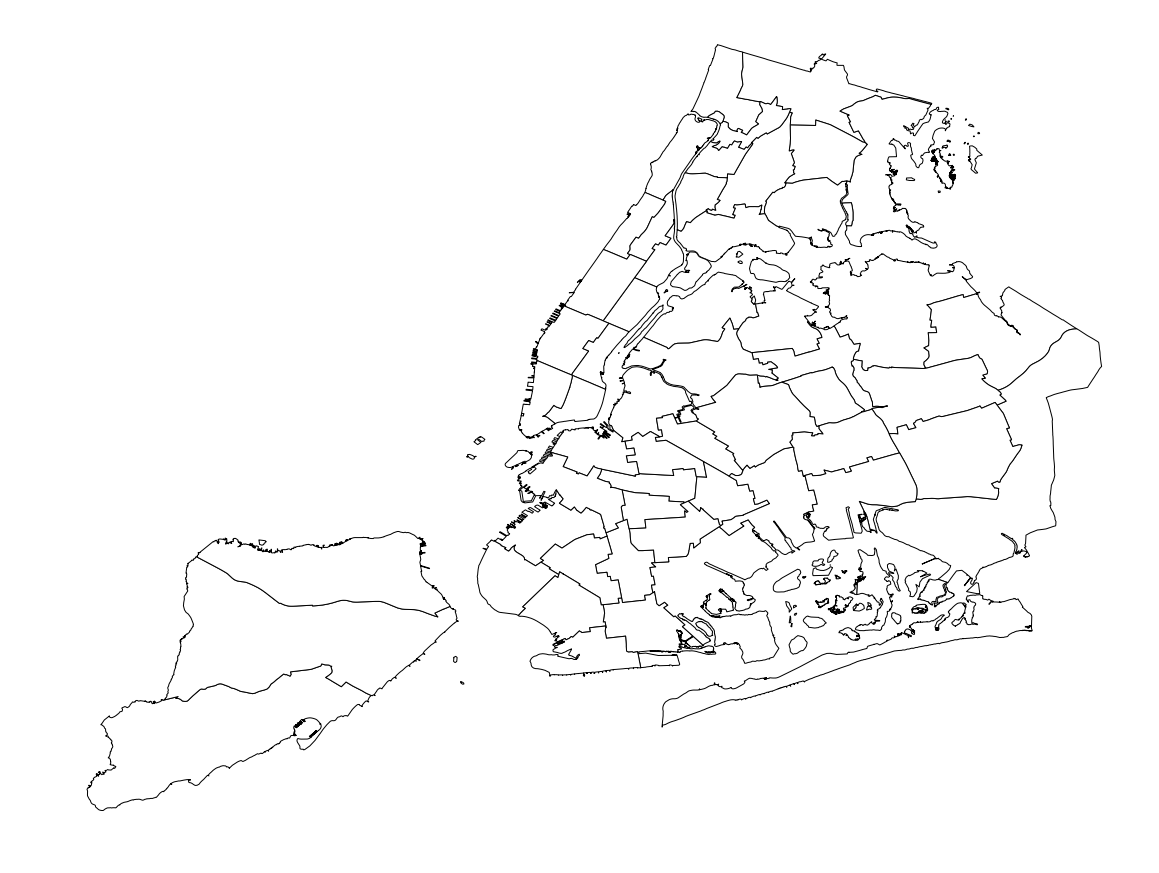

In [21]:
fig = pl.figure(figsize = (20,20))
ax = fig.add_subplot(111)
pumashp.plot(ax=ax, color="white", edgecolor="black", lw=1)
ax.axis('off');

Text(0.5, 1.0, 'Percentage of households receiving foodstamps in NYC')

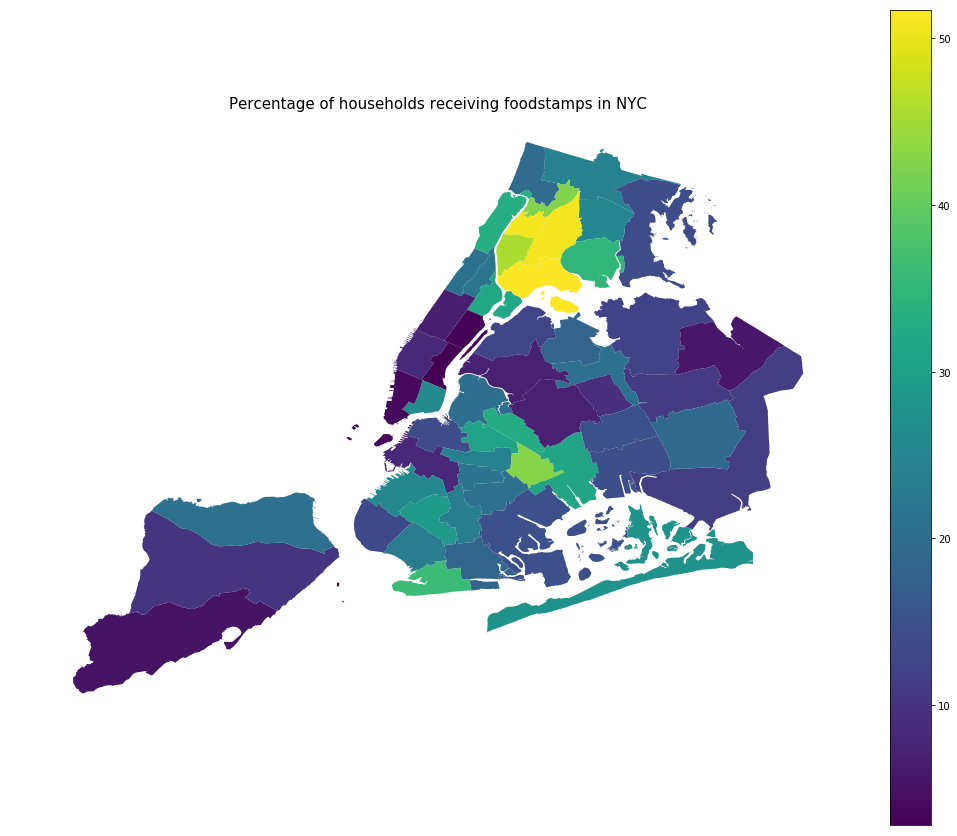

In [22]:
fig = pl.figure(figsize = (18,15))
ax = fig.add_subplot(111)
foodstamps_puma.plot("percent_households_receiving_food_stamps/snap_estimate_households",ax=ax,legend=True)
ax.axis('off');
ax.set_title('Percentage of households receiving foodstamps in NYC', fontsize=15)

In [23]:
MONTHLY_LNYC_pd.head()

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,EBT Calls Per Day
0,bx-01-116415,2017-03-06,756,Bronx,201,40.816751,-73.922955,522 MORRIS AVENUE,10451,3900,5.158730
1,mn-11-144674,2016-11-02,840,Manhattan,111,40.803834,-73.936351,186 EAST 125 STREET,10035,3303,3.932143
2,mn-11-144673,2016-03-28,840,Manhattan,111,40.803731,-73.936139,192 EAST 125 STREET,10035,1849,2.201190
3,mn-03-108238,2016-08-19,840,Manhattan,103,40.721716,-73.993343,217 BOWERY,10002,1802,2.145238
4,bx-01-118956,2016-12-22,830,Bronx,201,40.816679,-73.916483,2882 3 AVENUE,10455,1788,2.154217


In [24]:
for i in list(MONTHLY_LNYC_pd.columns):
    print(i)


Site ID
﻿Activation Date
Days Since Activation
Borough
Community Board
Latitude
Longitude
Street Address
Zip Code
EBT Total Calls
EBT Calls Per Day


In [25]:
#create geopanda-able longlats
MONTHLY_LNYC_pd['lonlat'] = list(zip(MONTHLY_LNYC_pd.Longitude, MONTHLY_LNYC_pd.Latitude))
MONTHLY_LNYC_pd['geometry'] = MONTHLY_LNYC_pd[['lonlat']].applymap(lambda x:Point(x))
# Convert to a GeoDataFrame
MONTHLY_LNYC_pd = gpd.GeoDataFrame(MONTHLY_LNYC_pd, geometry="geometry")

# set crs
MONTHLY_LNYC_pd.crs = {'init': 'epsg:4326'}

In [26]:
MONTHLY_LNYC_pd.crs

{'init': 'epsg:4326'}

In [27]:
foodstamps_puma.crs

In [28]:
MONTHLY_LNYC_pd.head()

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,EBT Calls Per Day,lonlat,geometry
0,bx-01-116415,2017-03-06,756,Bronx,201,40.816751,-73.922955,522 MORRIS AVENUE,10451,3900,5.158730,"(-73.92295481, 40.81675132)",POINT (-73.92295480999999 40.81675132)
1,mn-11-144674,2016-11-02,840,Manhattan,111,40.803834,-73.936351,186 EAST 125 STREET,10035,3303,3.932143,"(-73.93635101, 40.80383418)",POINT (-73.93635101 40.80383418)
2,mn-11-144673,2016-03-28,840,Manhattan,111,40.803731,-73.936139,192 EAST 125 STREET,10035,1849,2.201190,"(-73.936139, 40.803731)",POINT (-73.936139 40.803731)
3,mn-03-108238,2016-08-19,840,Manhattan,103,40.721716,-73.993343,217 BOWERY,10002,1802,2.145238,"(-73.993343, 40.721716)",POINT (-73.993343 40.721716)
4,bx-01-118956,2016-12-22,830,Bronx,201,40.816679,-73.916483,2882 3 AVENUE,10455,1788,2.154217,"(-73.91648285, 40.81667907)",POINT (-73.91648284999999 40.81667907)


In [29]:
EBT_FOODSTAMPS = gpd.sjoin(MONTHLY_LNYC_pd, foodstamps_puma, op='within') 

/home/jinalklaulitz/anaconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  '(%s != %s)' % (left_df.crs, right_df.crs))


In [30]:
EBT_FOODSTAMPS.head()

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,...,id,id2,geography,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA,puma,shape_area,shape_leng
0,bx-01-116415,2017-03-06,756,Bronx,201,40.816751,-73.922955,522 MORRIS AVENUE,10451,3900,...,7950000US3603710,3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,50736,26214,51.7,3710,3710,1.377966e+08,91086.012338
4,bx-01-118956,2016-12-22,830,Bronx,201,40.816679,-73.916483,2882 3 AVENUE,10455,1788,...,7950000US3603710,3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,50736,26214,51.7,3710,3710,1.377966e+08,91086.012338
5,bx-01-123228,2017-03-30,732,Bronx,201,40.816692,-73.919637,349 EAST 149 STREET,10451,1747,...,7950000US3603710,3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,50736,26214,51.7,3710,3710,1.377966e+08,91086.012338
33,bx-01-118955,2016-12-22,830,Bronx,201,40.817141,-73.916208,2901 3 AVENUE,10455,929,...,7950000US3603710,3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,50736,26214,51.7,3710,3710,1.377966e+08,91086.012338
40,bx-01-123208,2017-10-26,522,Bronx,201,40.816692,-73.916719,2883 3 AVENUE,10455,826,...,7950000US3603710,3603710,NYC-Bronx Community District 1 & 2--Hunts Poin...,50736,26214,51.7,3710,3710,1.377966e+08,91086.012338


In [31]:
for i in list(EBT_FOODSTAMPS.columns):
    print(i)

Site ID
﻿Activation Date
Days Since Activation
Borough
Community Board
Latitude
Longitude
Street Address
Zip Code
EBT Total Calls
EBT Calls Per Day
lonlat
geometry
index_right
id
id2
geography
total_estimate_households
households_receiving_food_stamps/snap_estimate_households
percent_households_receiving_food_stamps/snap_estimate_households
PUMA
puma
shape_area
shape_leng


In [32]:
viz_ebs_avgs = EBT_FOODSTAMPS[['EBT Total Calls','EBT Calls Per Day','lonlat','percent_households_receiving_food_stamps/snap_estimate_households','Community Board','puma','geometry','geography']]

In [33]:
viz_ebs_avgs.head(10)

,EBT Total Calls,EBT Calls Per Day,lonlat,percent_households_receiving_food_stamps/snap_estimate_households,Community Board,puma,geometry,geography
0,3900,5.158730,"(-73.92295481, 40.81675132)",51.7,201,3710,POINT (-73.92295480999999 40.81675132),NYC-Bronx Community District 1 & 2--Hunts Poin...
4,1788,2.154217,"(-73.91648285, 40.81667907)",51.7,201,3710,POINT (-73.91648284999999 40.81667907),NYC-Bronx Community District 1 & 2--Hunts Poin...
5,1747,2.386612,"(-73.919637, 40.816692)",51.7,201,3710,POINT (-73.91963699999999 40.816692),NYC-Bronx Community District 1 & 2--Hunts Poin...
33,929,1.119277,"(-73.91620844, 40.8171412)",51.7,201,3710,POINT (-73.91620844000001 40.8171412),NYC-Bronx Community District 1 & 2--Hunts Poin...
40,826,1.582375,"(-73.91671907, 40.8166923)",51.7,201,3710,POINT (-73.91671907 40.8166923),NYC-Bronx Community District 1 & 2--Hunts Poin...
41,821,2.325779,"(-73.91917137, 40.81399752)",51.7,201,3710,POINT (-73.91917137 40.81399752),NYC-Bronx Community District 1 & 2--Hunts Poin...
110,520,1.502890,"(-73.92143417, 40.81089649)",51.7,201,3710,POINT (-73.92143417 40.81089649),NYC-Bronx Community District 1 & 2--Hunts Poin...
112,518,1.644444,"(-73.91900611, 40.80775593)",51.7,201,3710,POINT (-73.91900611 40.80775593),NYC-Bronx Community District 1 & 2--Hunts Poin...
118,500,0.602410,"(-73.91366803, 40.81948845)",51.7,201,3710,POINT (-73.91366803 40.81948845),NYC-Bronx Community District 1 & 2--Hunts Poin...
135,463,0.681885,"(-73.912327, 40.821437)",51.7,201,3710,POINT (-73.912327 40.821437),NYC-Bronx Community District 1 & 2--Hunts Poin...


In [34]:
trimed_viz_ebs_avgs = viz_ebs_avgs[['geometry','geography','EBT Calls Per Day','puma']]

In [35]:
trimed_viz_ebs_avgs.head(10)

,geometry,geography,EBT Calls Per Day,puma
0,POINT (-73.92295480999999 40.81675132),NYC-Bronx Community District 1 & 2--Hunts Poin...,5.158730,3710
4,POINT (-73.91648284999999 40.81667907),NYC-Bronx Community District 1 & 2--Hunts Poin...,2.154217,3710
5,POINT (-73.91963699999999 40.816692),NYC-Bronx Community District 1 & 2--Hunts Poin...,2.386612,3710
33,POINT (-73.91620844000001 40.8171412),NYC-Bronx Community District 1 & 2--Hunts Poin...,1.119277,3710
40,POINT (-73.91671907 40.8166923),NYC-Bronx Community District 1 & 2--Hunts Poin...,1.582375,3710
41,POINT (-73.91917137 40.81399752),NYC-Bronx Community District 1 & 2--Hunts Poin...,2.325779,3710
110,POINT (-73.92143417 40.81089649),NYC-Bronx Community District 1 & 2--Hunts Poin...,1.502890,3710
112,POINT (-73.91900611 40.80775593),NYC-Bronx Community District 1 & 2--Hunts Poin...,1.644444,3710
118,POINT (-73.91366803 40.81948845),NYC-Bronx Community District 1 & 2--Hunts Poin...,0.602410,3710
135,POINT (-73.912327 40.821437),NYC-Bronx Community District 1 & 2--Hunts Poin...,0.681885,3710


In [36]:
grp_by = trimed_viz_ebs_avgs.groupby(['geography','puma'])['EBT Calls Per Day'].median().reset_index()

In [37]:
grp_by.head(5)

,geography,puma,EBT Calls Per Day
0,NYC-Bronx Community District 1 & 2--Hunts Poin...,3710,0.602410
1,"NYC-Bronx Community District 3 & 6--Belmont, C...",3705,0.900583
2,"NYC-Bronx Community District 4--Concourse, Hig...",3708,0.550000
3,NYC-Bronx Community District 5--Morris Heights...,3707,0.701755
4,"NYC-Bronx Community District 7--Bedford Park, ...",3706,0.448522


In [38]:
foodstamps_puma.head()

,id,id2,geography,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA,puma,shape_area,shape_leng,geometry
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,3701,3701,9.792852e+07,53227.144461,POLYGON ((-73.89995351384715 40.91238343476548...
1,7950000US3603702,3603702,"NYC-Bronx Community District 12--Wakefield, Wi...",48495,11904,24.5,3702,3702,1.889860e+08,106050.002487,POLYGON ((-73.86948896192655 40.87798946841054...
2,7950000US3603703,3603703,"NYC-Bronx Community District 10--Co-op City, P...",47551,6714,14.1,3703,3703,2.670108e+08,303565.021099,(POLYGON ((-73.78833349834532 40.8346671297593...
3,7950000US3603704,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44518,11236,25.2,3704,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,3705,3705,1.224951e+08,68657.316149,POLYGON ((-73.87045508990893 40.86663286876232...


In [39]:
foodstamps_ebt_percent = foodstamps_puma.merge(grp_by,on='puma')

In [40]:
foodstamps_ebt_percent.head()

,id,id2,geography_x,total_estimate_households,households_receiving_food_stamps/snap_estimate_households,percent_households_receiving_food_stamps/snap_estimate_households,PUMA,puma,shape_area,shape_leng,geometry,geography_y,EBT Calls Per Day
0,7950000US3603701,3603701,"NYC-Bronx Community District 8--Riverdale, Fie...",42374,8439,19.9,3701,3701,9.792852e+07,53227.144461,POLYGON ((-73.89995351384715 40.91238343476548...,"NYC-Bronx Community District 8--Riverdale, Fie...",0.652961
1,7950000US3603705,3603705,"NYC-Bronx Community District 3 & 6--Belmont, C...",57417,29250,50.9,3705,3705,1.224951e+08,68657.316149,POLYGON ((-73.87045508990893 40.86663286876232...,"NYC-Bronx Community District 3 & 6--Belmont, C...",0.900583
2,7950000US3603706,3603706,"NYC-Bronx Community District 7--Bedford Park, ...",45122,19157,42.5,3706,3706,4.388687e+07,51799.404183,POLYGON ((-73.87772817661512 40.88345419508449...,"NYC-Bronx Community District 7--Bedford Park, ...",0.448522
3,7950000US3603707,3603707,NYC-Bronx Community District 5--Morris Heights...,45284,23023,50.8,3707,3707,4.228113e+07,37347.925798,POLYGON ((-73.89964261686002 40.86221043694765...,NYC-Bronx Community District 5--Morris Heights...,0.701755
4,7950000US3603708,3603708,"NYC-Bronx Community District 4--Concourse, Hig...",49026,22286,45.5,3708,3708,5.589695e+07,34852.437966,"POLYGON ((-73.92478318783078 40.8447526648105,...","NYC-Bronx Community District 4--Concourse, Hig...",0.550000


Text(0.5, 1.0, 'Median EBT calls per day in NYC')

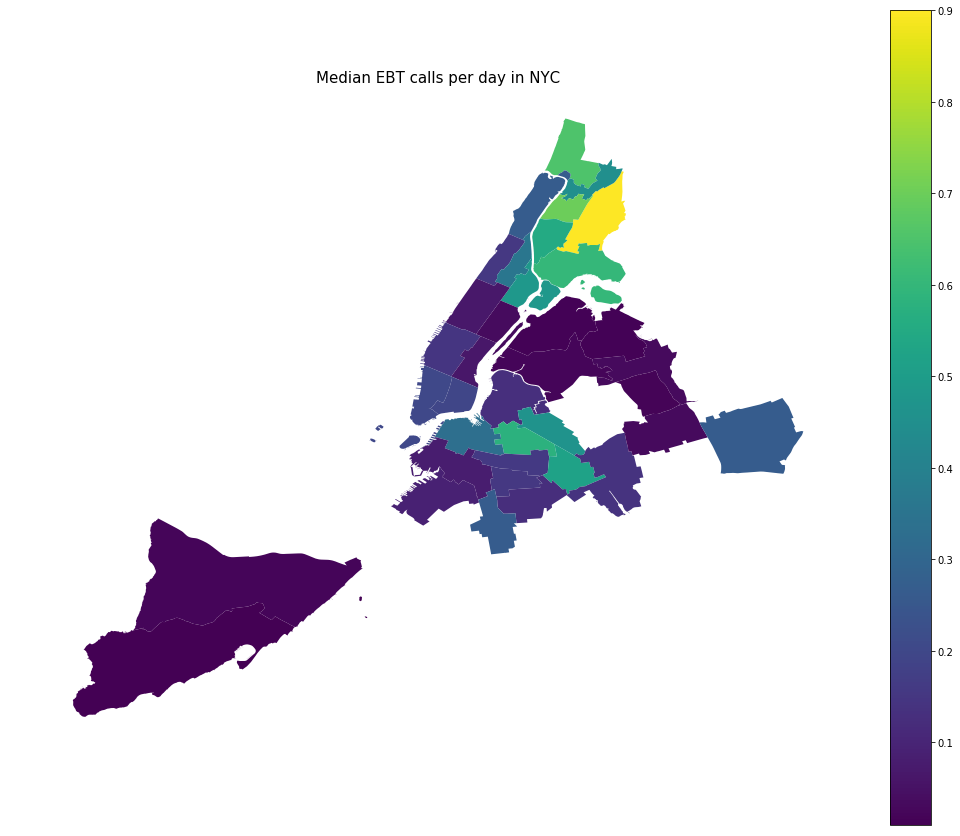

In [41]:
fig = pl.figure(figsize = (18,15))
ax = fig.add_subplot(111)
foodstamps_ebt_percent.plot("EBT Calls Per Day",ax=ax,legend=True)
ax.axis('off');
ax.set_title('Median EBT calls per day in NYC', fontsize=15)

In [43]:
#histogram_intersection = lambda a, b: np.minimum(a, b).sum().round(decimals=1)
foodstamps_ebt_percent[['EBT Calls Per Day','percent_households_receiving_food_stamps/snap_estimate_households']].corr()

,EBT Calls Per Day,percent_households_receiving_food_stamps/snap_estimate_households
EBT Calls Per Day,1.000000,0.801612
percent_households_receiving_food_stamps/snap_estimate_households,0.801612,1.000000


In [6]:
MONTHLY_LNYC_pd.head()

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,EBT Calls Per Day
0,bx-01-116415,2017-03-06,756,Bronx,201,40.816751,-73.922955,522 MORRIS AVENUE,10451,3900,5.158730
1,mn-11-144674,2016-11-02,840,Manhattan,111,40.803834,-73.936351,186 EAST 125 STREET,10035,3303,3.932143
2,mn-11-144673,2016-03-28,840,Manhattan,111,40.803731,-73.936139,192 EAST 125 STREET,10035,1849,2.201190
3,mn-03-108238,2016-08-19,840,Manhattan,103,40.721716,-73.993343,217 BOWERY,10002,1802,2.145238
4,bx-01-118956,2016-12-22,830,Bronx,201,40.816679,-73.916483,2882 3 AVENUE,10455,1788,2.154217


In [15]:
print("table has {} rows".format(len(MONTHLY_LNYC_pd.index)))

table has 1778 rows


In [8]:
MONTHLY_LNYC_pd.columns

Index(['Site ID', '﻿Activation Date', 'Days Since Activation', 'Borough',
       'Community Board', 'Latitude', 'Longitude', 'Street Address',
       'Zip Code', 'EBT Total Calls', 'EBT Calls Per Day'],
      dtype='object')

In [7]:
LINK_EBT_pd.head()

,AP Device Name,Boro,CB,PPT ID,Street Address,Latitude,Longitude,SSID(s),Uptime %,Number of Unique Clients,...,Minutes Used,MB Transferred (upload),MB Transferred (download),MB Transferred (total),Daily Avg - Number of Unique Clients,Daily Avg - Number of Sessions,Daily Avg - Minutes Used,Daily Avg - MB Transferred (upload),Daily Avg - MB Transferred (download),Daily Avg - MB Transferred (total)
0,bk-01-108703,bk,1,108703,213 UNION AVENUE,40.706822,-73.950529,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",100.00%,"11,593",...,"102,960","17,046","142,473","159,519",374,"1,187","3,321",550,"4,596","5,146"
1,bk-01-108949,bk,1,108949,709 BROADWAY,40.701419,-73.942908,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",99.87%,"25,219",...,"234,063","41,436","327,003","368,439",814,"2,426","7,550","1,337","10,548","11,885"
2,bk-01-108952,bk,1,108952,511 BROADWAY,40.705371,-73.949963,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",100.00%,"23,497",...,"138,142","27,941","194,260","222,201",758,"1,830","4,456",901,"6,266","7,168"
3,bk-01-109091,bk,1,109091,24 GRAHAM AVENUE,40.701542,-73.942169,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",99.87%,"9,336",...,"179,954","18,587","246,474","265,060",301,"1,014","5,805",600,"7,951","8,550"
4,bk-01-109252,bk,1,109252,395 BROADWAY,40.707208,-73.954195,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",100.00%,"35,990",...,"298,471","52,864","359,326","412,189","1,894","5,656","15,709","2,782","18,912","21,694"


In [16]:
print("table has {} rows".format(len(LINK_EBT_pd.index)))

table has 1709 rows


In [9]:
LINK_EBT_pd.columns

Index(['AP Device Name', 'Boro', 'CB', 'PPT ID', 'Street Address', 'Latitude',
       'Longitude', 'SSID(s)', 'Uptime %', 'Number of Unique Clients',
       'Number of Sessions', 'Minutes Used', 'MB Transferred (upload)',
       'MB Transferred (download)', 'MB Transferred (total)',
       'Daily Avg - Number of Unique Clients',
       'Daily Avg - Number of Sessions', 'Daily Avg - Minutes Used',
       'Daily Avg - MB Transferred (upload)',
       'Daily Avg - MB Transferred (download)',
       'Daily Avg - MB Transferred (total)'],
      dtype='object')

In [28]:
cols_to_use = LINK_EBT_pd.columns.difference(MONTHLY_LNYC_pd.columns)

#originally tried with outer join
#combination_pd = MONTHLY_LNYC_pd.merge(LINK_EBT_pd[cols_to_use], left_on='Site ID', right_on='AP Device Name',how="outer")

#trying inner join
combination_pd = MONTHLY_LNYC_pd.merge(LINK_EBT_pd[cols_to_use], left_on='Site ID', right_on='AP Device Name')

In [29]:
combination_pd.head()

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,...,Daily Avg - Number of Unique Clients,MB Transferred (download),MB Transferred (total),MB Transferred (upload),Minutes Used,Number of Sessions,Number of Unique Clients,PPT ID,SSID(s),Uptime %
0,bx-01-116415,2017-03-06,756,Bronx,201,40.816751,-73.922955,522 MORRIS AVENUE,10451,3900,...,613,"700,413","756,805","56,392","385,989","88,804","19,004",116415,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",100.00%
1,mn-11-144674,2016-11-02,840,Manhattan,111,40.803834,-73.936351,186 EAST 125 STREET,10035,3303,...,"1,063","322,277","367,996","45,719","252,864","95,302","32,966",144674,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",100.00%
2,mn-11-144673,2016-03-28,840,Manhattan,111,40.803731,-73.936139,192 EAST 125 STREET,10035,1849,...,662,"95,887","110,817","14,930","101,727","44,759","20,531",144673,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",100.00%
3,mn-03-108238,2016-08-19,840,Manhattan,103,40.721716,-73.993343,217 BOWERY,10002,1802,...,839,"244,328","288,415","44,086","209,471","59,564","26,022",108238,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",100.00%
4,bx-01-118956,2016-12-22,830,Bronx,201,40.816679,-73.916483,2882 3 AVENUE,10455,1788,...,865,"238,453","271,674","33,221","288,474","92,390","26,823",118956,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",99.87%


In [35]:
print("combination_pd has {} rows".format(len(combination_pd.index)))
print("MONTHLY_LNYC_pd has {} rows".format(len(MONTHLY_LNYC_pd.index)))
print("LINK_EBT_pd has {} rows".format(len(LINK_EBT_pd.index)))
#26 atleast unable to join

combination_pd has 1683 rows
MONTHLY_LNYC_pd has 1778 rows
LINK_EBT_pd has 1709 rows


In [31]:
combination_pd.columns

Index(['Site ID', '﻿Activation Date', 'Days Since Activation', 'Borough',
       'Community Board', 'Latitude', 'Longitude', 'Street Address',
       'Zip Code', 'EBT Total Calls', 'EBT Calls Per Day', 'AP Device Name',
       'Boro', 'CB', 'Daily Avg - MB Transferred (download)',
       'Daily Avg - MB Transferred (total)',
       'Daily Avg - MB Transferred (upload)', 'Daily Avg - Minutes Used',
       'Daily Avg - Number of Sessions',
       'Daily Avg - Number of Unique Clients', 'MB Transferred (download)',
       'MB Transferred (total)', 'MB Transferred (upload)', 'Minutes Used',
       'Number of Sessions', 'Number of Unique Clients', 'PPT ID', 'SSID(s)',
       'Uptime %'],
      dtype='object')

In [ ]:
df1[~df1.isin(df2)]

In [41]:
combi_sites = combination_pd['Site ID']
combi_apdevice = combination_pd['AP Device Name']
MONTHLY_LNYC_sites = MONTHLY_LNYC_pd['Site ID']
LINK_EBT__apdevice = LINK_EBT_pd['AP Device Name']

In [42]:
print("combination site_id has {} rows".format(len(combi_sites)))
print("combination site_id has {} unique rows".format(len(set(combi_sites))))
print("combination AP Device Name has {} rows".format(len(combi_apdevice)))
print("combination AP Device Name has {} unique rows".format(len(set(combi_apdevice))))
print("-----------------------------------")
print("MONTHLY_LNYC_sites site_id Name has {} rows".format(len(MONTHLY_LNYC_sites)))
print("MONTHLY_LNYC_sites site_id Name has {} unique rows".format(len(set(MONTHLY_LNYC_sites))))     
print("-----------------------------------")
print("LINK_EBT__apdevice AP Device Name has {} rows".format(len(LINK_EBT__apdevice)))
print("LINK_EBT__apdevice AP Device Name has {} unique rows".format(len(set(LINK_EBT__apdevice))))     

combination site_id has 1683 rows
combination site_id has 1683 unique rows
combination AP Device Name has 1683 rows
combination AP Device Name has 1683 unique rows
-----------------------------------
MONTHLY_LNYC_sites site_id Name has 1778 rows
MONTHLY_LNYC_sites site_id Name has 1778 unique rows
-----------------------------------
LINK_EBT__apdevice AP Device Name has 1709 rows
LINK_EBT__apdevice AP Device Name has 1709 unique rows


In [57]:
MONTHLY_DIDNTJOIN[MONTHLY_DIDNTJOIN['Borough']=='Brooklyn']

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,EBT Calls Per Day
563,bk-03-108944,2018-09-06,207,Brooklyn,303,40.698956,-73.938932,846 BROADWAY,11206,139,0.671498
645,bk-16-126638,2017-01-17,804,Brooklyn,316,40.678079,-73.908374,2208 FULTON STREET,11233,117,0.145522
1509,bk-06-125928,2017-06-23,647,Brooklyn,306,40.680732,-73.977446,63 5 AVENUE,11217,12,0.018547
1542,bk-01-146091,2019-01-29,62,Brooklyn,301,40.709900,-73.962440,178 BROADWAY,11211,10,0.161290
1685,bk-01-146092,2019-01-22,69,Brooklyn,301,40.707581,-73.955316,361 BROADWAY,11211,4,0.057971
1744,bk-01-146073,2018-08-02,242,Brooklyn,301,40.718513,-73.957231,153 NORTH 8 STREET,11249,2,0.008264
1772,bk-14-145949,2019-03-01,31,Brooklyn,314,40.648607,-73.957820,9 SNYDER AVENUE,11226,1,0.032258
1773,bk-08-145993,2019-03-20,12,Brooklyn,308,40.671355,-73.957793,792 FRANKLIN AVENUE,11238,1,0.083333
1774,bk-01-146018,2018-02-02,423,Brooklyn,301,40.722504,-73.959202,43 NORTH 11 STREET,11249,1,0.002364


In [51]:
#from the monthy dataset that didn't join
MONTHLY_DIDNTJOIN = MONTHLY_LNYC_pd[~MONTHLY_LNYC_sites.isin(combi_sites)]
print("MONTHLY_DIDNTJOIN has {} rows".format(len(MONTHLY_DIDNTJOIN.index)))

MONTHLY_DIDNTJOIN has 95 rows


In [56]:
EBT_DIDNTJOIN[EBT_DIDNTJOIN['Boro']=='bk']

,AP Device Name,Boro,CB,PPT ID,Street Address,Latitude,Longitude,SSID(s),Uptime %,Number of Unique Clients,...,Minutes Used,MB Transferred (upload),MB Transferred (download),MB Transferred (total),Daily Avg - Number of Unique Clients,Daily Avg - Number of Sessions,Daily Avg - Minutes Used,Daily Avg - MB Transferred (upload),Daily Avg - MB Transferred (download),Daily Avg - MB Transferred (total)
30,bk-01-145996,bk,1,145996,79 GRAND STREET,40.715732,-73.964243,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",99.87%,"10,025",...,"78,946","29,078","85,800","114,878",323,810,"2,547",938,"2,768","3,706"
39,bk-01-146010,bk,1,146010,145 WYTHE AVENUE,40.719404,-73.960474,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",99.87%,"14,848",...,"101,089","50,511","120,931","171,441",479,"1,216","3,261","1,629","3,901","5,530"
48,bk-01-146041,bk,1,146041,43 NORTH 10 STREET,40.721943,-73.959775,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",100.00%,"8,715",...,"46,878","11,810","57,518","69,328",281,580,"1,512",381,"1,855","2,236"
52,bk-01-146085,bk,1,146085,33 SOUTH 2 STREET,40.714707,-73.966525,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",100.00%,"1,268",...,"5,956","1,041","5,662","6,703",317,540,"1,489",260,"1,415","1,676"
60,bk-02-126247,bk,2,126247,280 CADMAN PLAZA WEST,40.696070,-73.991264,"LinkNYC Free Wi-Fi, LinkNYC Private, SONYC IOT",100.00%,"16,616",...,"122,189","34,311","124,104","158,415",536,"1,392","3,942","1,107","4,003","5,110"


In [52]:
#from the ebt dataset that didnt join
EBT_DIDNTJOIN = LINK_EBT_pd[~LINK_EBT__apdevice.isin(combi_apdevice)]
print("EBT_DIDNTJOIN has {} rows".format(len(EBT_DIDNTJOIN.index)))  

EBT_DIDNTJOIN has 26 rows


## checking duplicates

In [32]:
#combination_pd[combination_pd['Site ID'].duplicated(keep=False)]

#check for site_id = null
combination_pd[combination_pd['Site ID'].isnull().values]

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,...,Daily Avg - Number of Unique Clients,MB Transferred (download),MB Transferred (total),MB Transferred (upload),Minutes Used,Number of Sessions,Number of Unique Clients,PPT ID,SSID(s),Uptime %


In [33]:
#checking for nulls on original files
MONTHLY_LNYC_pd[MONTHLY_LNYC_pd['Site ID'].isnull().values]

,Site ID,﻿Activation Date,Days Since Activation,Borough,Community Board,Latitude,Longitude,Street Address,Zip Code,EBT Total Calls,EBT Calls Per Day


In [34]:
#checking for nulls on original files
LINK_EBT_pd[LINK_EBT_pd['AP Device Name'].isnull().values]

,AP Device Name,Boro,CB,PPT ID,Street Address,Latitude,Longitude,SSID(s),Uptime %,Number of Unique Clients,...,Minutes Used,MB Transferred (upload),MB Transferred (download),MB Transferred (total),Daily Avg - Number of Unique Clients,Daily Avg - Number of Sessions,Daily Avg - Minutes Used,Daily Avg - MB Transferred (upload),Daily Avg - MB Transferred (download),Daily Avg - MB Transferred (total)
